Project Title: Detection of Parkinson's Disease 

Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Loading dataset

In [4]:
#Link to dataset: https://archive.ics.uci.edu/dataset/174/parkinsons
df=pd.read_csv("parkinsons.data")

In [5]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
df.shape

(195, 24)

Removing column name

In [8]:
df=df.drop(["name"], axis=1)

In [9]:
df.sample(10)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
24,163.656,200.841,76.779,0.00742,0.000050,0.00380,0.00390,0.01140,0.01659,0.164,0.00738,0.00948,0.01497,0.02214,0.01778,23.831,1,0.397937,0.732479,-5.557447,0.220890,2.692176,0.215961
47,252.455,261.487,182.786,0.00185,0.000007,0.00092,0.00113,0.00276,0.01152,0.103,0.00614,0.00730,0.00860,0.01841,0.00432,26.805,0,0.610367,0.635204,-7.319510,0.200873,2.028612,0.086398
156,122.336,142.369,94.794,0.00727,0.000060,0.00415,0.00339,0.01246,0.02293,0.223,0.01205,0.01289,0.01771,0.03615,0.03191,22.953,1,0.611679,0.623731,-5.435100,0.230532,2.699645,0.220546
114,206.327,226.355,92.020,0.00495,0.000020,0.00302,0.00246,0.00905,0.02105,0.209,0.01107,0.01284,0.01604,0.03320,0.01048,21.864,1,0.331508,0.715121,-6.729713,0.181701,2.938114,0.115515
129,120.078,126.632,105.667,0.00270,0.000020,0.00116,0.00135,0.00349,0.01022,0.090,0.00476,0.00588,0.00903,0.01428,0.00487,26.369,1,0.491345,0.718839,-5.892061,0.195976,2.108873,0.183572
170,244.990,272.210,239.170,0.00451,0.000020,0.00279,0.00237,0.00837,0.01897,0.181,0.01084,0.01121,0.01255,0.03253,0.01049,21.528,0,0.522812,0.646818,-7.304500,0.171088,2.095237,0.096220
89,179.711,225.930,144.878,0.00709,0.000040,0.00391,0.00419,0.01172,0.04313,0.442,0.02297,0.02768,0.03455,0.06892,0.07223,11.866,1,0.590951,0.745526,-4.379411,0.375531,3.671155,0.332086
73,112.014,588.518,107.024,0.00533,0.000050,0.00268,0.00329,0.00805,0.02448,0.226,0.01373,0.01375,0.01956,0.04120,0.00623,24.178,1,0.509127,0.789532,-5.389129,0.306636,1.928708,0.225461
124,156.239,195.107,79.820,0.00694,0.000040,0.00403,0.00395,0.01209,0.02343,0.224,0.01289,0.01420,0.01720,0.03867,0.02020,19.196,1,0.618663,0.728421,-5.944191,0.143359,1.929715,0.181988
63,228.832,234.619,223.634,0.00296,0.000010,0.00175,0.00155,0.00526,0.01644,0.145,0.00882,0.01075,0.01179,0.02647,0.00351,25.964,0,0.256570,0.683296,-7.245620,0.018689,2.498224,0.093534


More information

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

In [19]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


Check for missing values

In [22]:
df.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

Labels for Status
1. {1: Person has disease}
2. {0: Person is absolutely healthy}

In [25]:
df["status"].value_counts()

status
1    147
0     48
Name: count, dtype: int64

Data visualisation

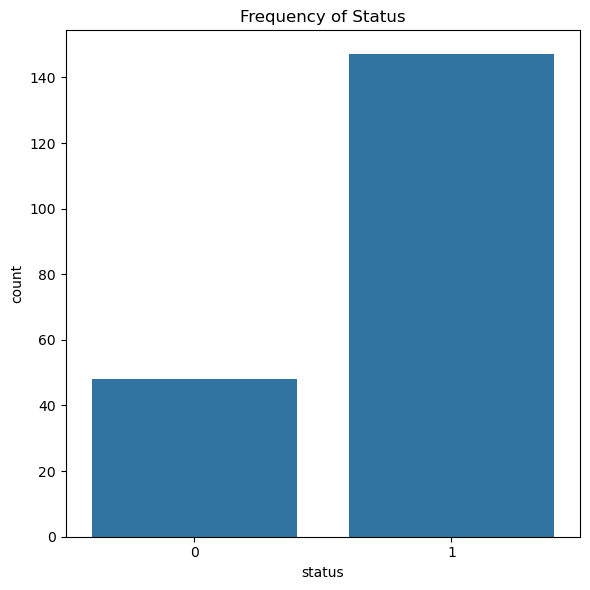

In [28]:
#Countplot for status
plt.figure(figsize=(6,6))
sns.countplot(data=df, x="status")
plt.title("Frequency of Status")
plt.tight_layout()
plt.show()

Training and testing

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X=df.drop(["status"], axis=1)
y=df["status"]

In [35]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [37]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [39]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=42)

Data standardization

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
#mmc
mmc=MinMaxScaler(feature_range = (0,1))

In [46]:
X_train_trans=mmc.fit_transform(X_train)
X_test_trans=mmc.transform(X_test)

XGB Classifier

In [49]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [50]:
from xgboost import XGBClassifier

In [51]:
xgb=XGBClassifier()

In [52]:
#Model 
model=xgb.fit(X_train_trans, y_train)

In [53]:
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [54]:
y_pred=xgb.predict(X_test_trans)

In [55]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

Accuracy score

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [58]:
score=accuracy_score(y_test, y_pred)
print("Accuracy %=",(score*100))

Accuracy %= 94.87179487179486


Classification report

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



Confusion matrix

In [62]:
matrix=confusion_matrix(y_test, y_pred)

In [63]:
matrix

array([[ 5,  2],
       [ 0, 32]], dtype=int64)

Heatmap

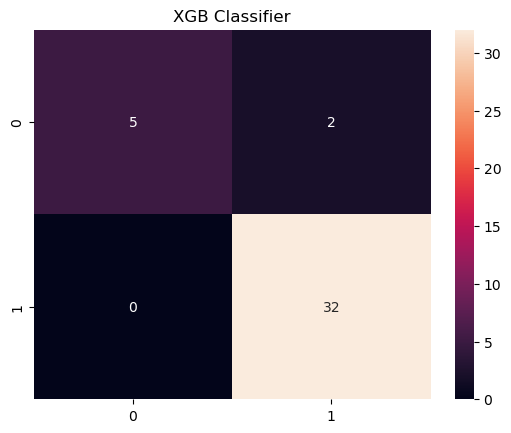

In [65]:
sns.heatmap(data=matrix, annot=True, fmt='g')
plt.title("XGB Classifier")
plt.show()

Model testing

In [67]:
test_input_1=pd.DataFrame([[119.992, 157.302, 74.997, 0.00784, 0.00007, 0.00370, 0.00554, 
                          0.01109, 0.04374, 0.426, 0.02182, 0.03130, 0.02971, 0.06545, 
                          0.02211, 21.033, 0.414783, 0.815285, -4.813031, 0.266482, 2.301442, 0.284654]], 
                        columns=["MDVP:Fo(Hz)", "MDVP:Fhi(Hz)", "MDVP:Flo(Hz)", "MDVP:Jitter(%)", "MDVP:Jitter(Abs)",
                                 "MDVP:RAP", "MDVP:PPQ", "Jitter:DDP", "MDVP:Shimmer", "MDVP:Shimmer(dB)", "Shimmer:APQ3",
                                 "Shimmer:APQ5", "MDVP:APQ", "Shimmer:DDA", "NHR", "HNR", "RPDE", "DFA", "spread1", "spread2",
                                 "D2", "PPE"])

In [68]:
xgb.predict(test_input_1)

array([0])

In [72]:
test_input_2=pd.DataFrame([[129.992, 167.302, 75.997, 0.00984, 0.00007, 0.00370, 0.00554, 
                          0.01209, 0.05, 0.4, 0.02182, 0.03130, 0.02971, 0.06545, 
                          0.02211, 21.033, 0.414783, 0.815285, -4.813031, 0.266482, 3.301442, 0.284]], 
                        columns=["MDVP:Fo(Hz)", "MDVP:Fhi(Hz)", "MDVP:Flo(Hz)", "MDVP:Jitter(%)", "MDVP:Jitter(Abs)",
                                 "MDVP:RAP", "MDVP:PPQ", "Jitter:DDP", "MDVP:Shimmer", "MDVP:Shimmer(dB)", "Shimmer:APQ3",
                                 "Shimmer:APQ5", "MDVP:APQ", "Shimmer:DDA", "NHR", "HNR", "RPDE", "DFA", "spread1", "spread2",
                                 "D2", "PPE"])

In [82]:
xgb.predict(test_input_2)

array([0])

Import pickle

In [72]:
import pickle
with open("Model_Prediction.sav", "wb") as f:
    pickle.dump(model,f)
    

In [73]:
with open("MinMaxScaler.sav", "wb") as f:
    pickle.dump(mmc,f)